In [23]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf
import datetime as dt

In [24]:
# Inline plotting
%matplotlib inline


In [25]:
# -----------------------------
# Lấy dữ liệu từ Yahoo Finance
# -----------------------------
end = dt.datetime.now()
start = dt.datetime(2017, 1, 1)

In [26]:
# Dùng yfinance thay cho pandas_datareader
df = yf.download('AAPL', start=start, end=end)


/tmp/ipython-input-3450946715.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download('AAPL', start=start, end=end)
[*********************100%***********************]  1 of 1 completed


In [27]:
# Lưu ra file CSV (nếu cần)
df.to_csv('AAPL.csv')

print(df.tail())


Price            Close        High         Low        Open    Volume
Ticker            AAPL        AAPL        AAPL        AAPL      AAPL
Date                                                                
2025-09-09  234.350006  238.779999  233.360001  237.000000  66313900
2025-09-10  226.789993  232.419998  225.949997  232.190002  83440800
2025-09-11  230.029999  230.449997  226.649994  226.880005  50208600
2025-09-12  234.070007  234.509995  229.020004  229.220001  55824200
2025-09-17  239.710007  240.100006  238.789993  238.970001   6141277


MultiIndex([( 'Close', 'AAPL'),
            (  'High', 'AAPL'),
            (   'Low', 'AAPL'),
            (  'Open', 'AAPL'),
            ('Volume', 'AAPL')],
           names=['Price', 'Ticker'])


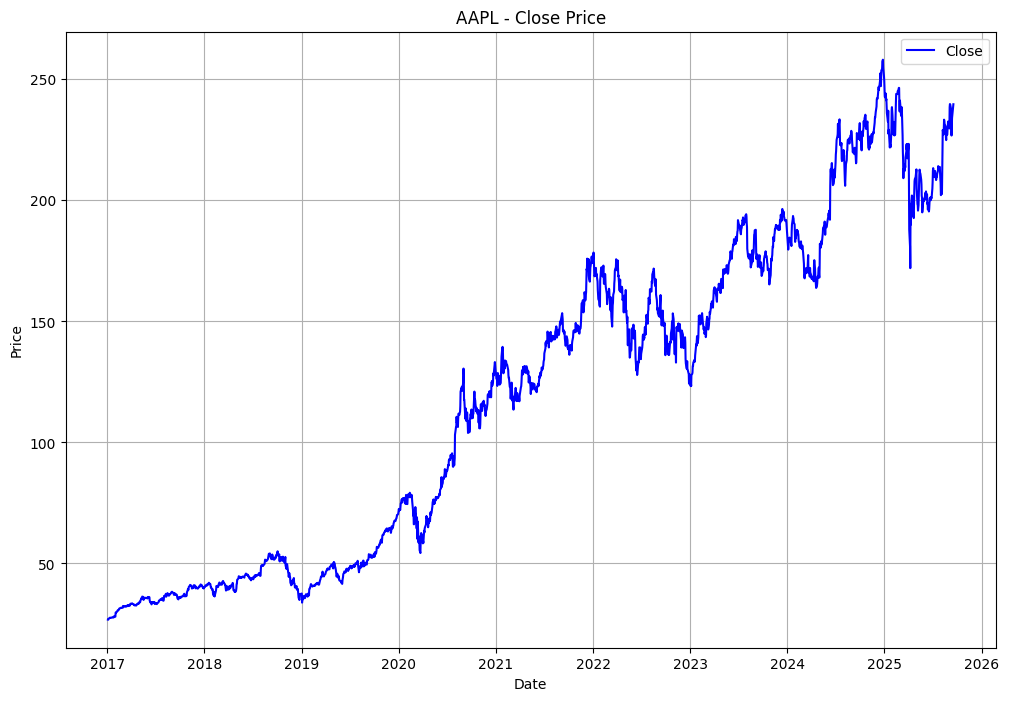

In [28]:
# Kiểm tra cột thực tế trong DataFrame
print(df.columns)

# Nếu có "Adj Close" thì dùng, nếu không thì fallback sang "Close"
col = "Adj Close" if "Adj Close" in df.columns else "Close"

plt.figure(figsize=(12, 8))
plt.plot(df[col], label=col, color='blue')
plt.legend()
plt.title(f"AAPL - {col} Price")
plt.xlabel("Date")
plt.ylabel("Price")
plt.grid(True)
plt.show()





In [29]:
print(df.columns)   # In ra danh sách các cột trong file


MultiIndex([( 'Close', 'AAPL'),
            (  'High', 'AAPL'),
            (   'Low', 'AAPL'),
            (  'Open', 'AAPL'),
            ('Volume', 'AAPL')],
           names=['Price', 'Ticker'])


In [32]:
print(df.dtypes)
print(df.head())


Close     object
High      object
Low       object
Open      object
Volume    object
dtype: object
                         Close                High                 Low  \
Price                                                                    
Ticker                    AAPL                AAPL                AAPL   
Date                       NaN                 NaN                 NaN   
2017-01-03  26.796831130981445   26.83835879105854  26.476145996007276   
2017-01-04  26.766841888427734  26.879890500214323  26.704551269013233   
2017-01-05   26.90296173095703   26.96063894901325   26.71839392910952   

                          Open     Volume  
Price                                      
Ticker                    AAPL       AAPL  
Date                       NaN        NaN  
2017-01-03  26.716083391989514  115127600  
2017-01-04   26.72762180360494   84472400  
2017-01-05   26.74377204586778   88774400  


/tmp/ipython-input-648813159.py:13: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df["Date"] = pd.to_datetime(df["Date"], errors="coerce")


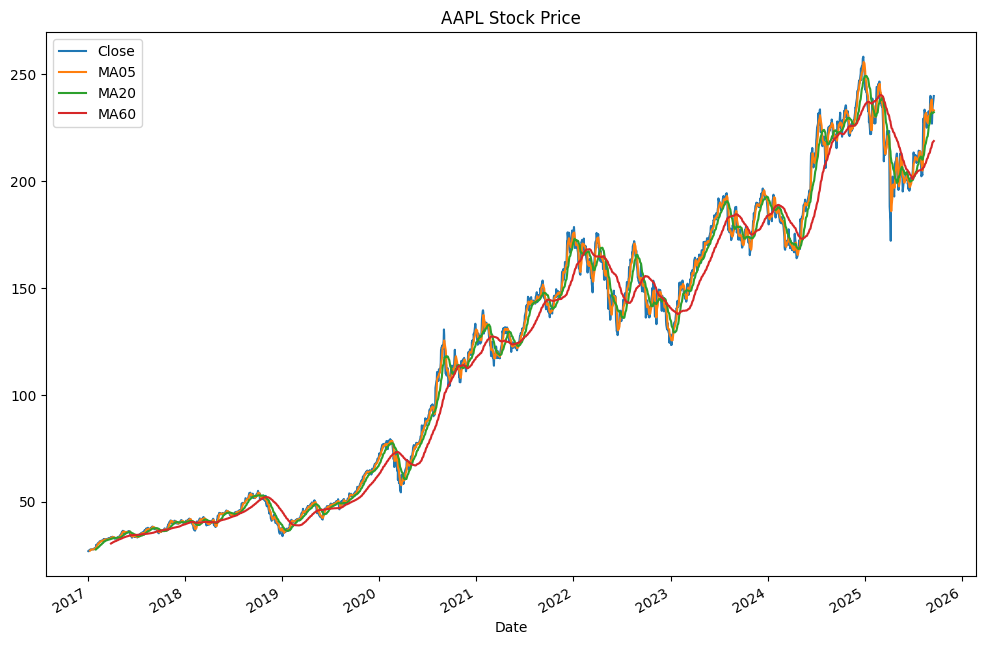

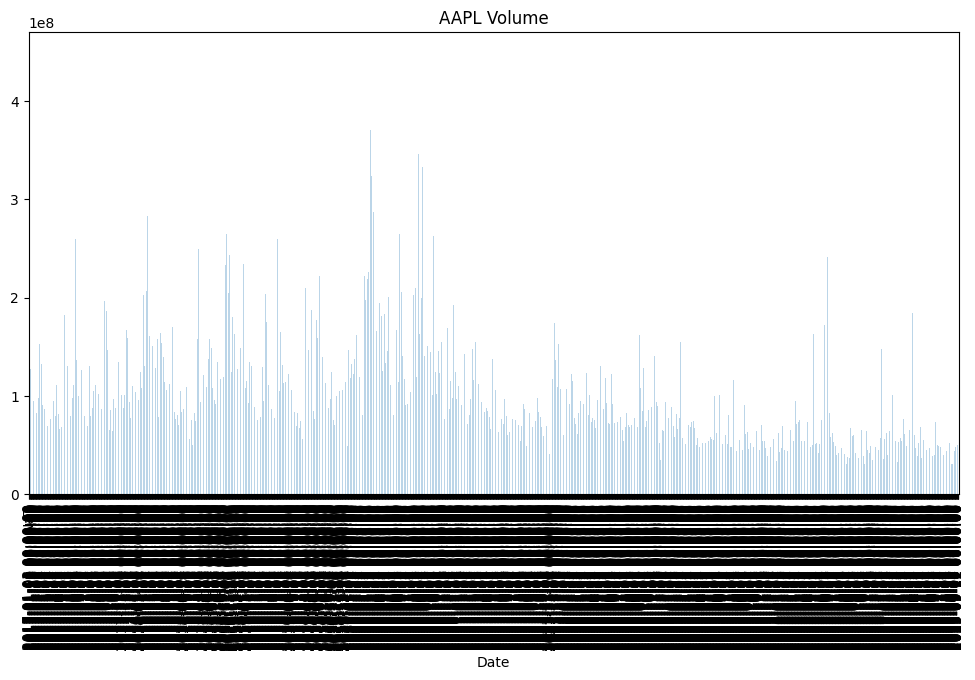

In [34]:
import pandas as pd
import matplotlib.pyplot as plt

# Đọc file CSV
df = pd.read_csv("AAPL.csv")

# Xóa hàng đầu tiên nếu nó chứa chữ 'Ticker'
if df.iloc[0].str.contains("AAPL").any():
    df = df.drop(0)

# Đặt lại index theo cột Date
df = df.rename(columns={"Price": "Date"})  # nếu cột đầu tiên là "Price"
df["Date"] = pd.to_datetime(df["Date"], errors="coerce")
df = df.set_index("Date")

# Ép kiểu dữ liệu về số
cols = ["Close", "High", "Low", "Open", "Volume"]
for c in cols:
    df[c] = pd.to_numeric(df[c], errors="coerce")

# Tính MA
df["MA05"] = df["Close"].rolling(5).mean()
df["MA20"] = df["Close"].rolling(20).mean()
df["MA60"] = df["Close"].rolling(60).mean()

# Vẽ biểu đồ giá + MA
plt.figure(figsize=(12, 8))
df["Close"].plot(label="Close")
df["MA05"].plot(label="MA05")
df["MA20"].plot(label="MA20")
df["MA60"].plot(label="MA60")
plt.legend()
plt.title("AAPL Stock Price")
plt.show()

# Vẽ Volume
plt.figure(figsize=(12, 6))
df["Volume"].plot(kind="bar", alpha=0.3)
plt.title("AAPL Volume")
plt.show()
